# All Data

In [628]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.options.display.float_format = "{:,.2f}".format

In [629]:
import json

with open('./Men/2020_games_stage2.json') as f:
    data = json.load(f)
    
data.keys()

dict_keys(['sort', 'pagination', 'cachekey', 'dataType', 'competition', 'leaderboardRows', 'version', 'ordinals', 'totalPages', 'currentPage'])

In [630]:
leaderboard = data['leaderboardRows']

In [631]:
database = []
for i in range(len(leaderboard)):
    competitors = leaderboard[i]['entrant']['competitorName']
    for j in range(len(leaderboard[i]['scores'])):
        workout_number = leaderboard[i]['scores'][j]['ordinal']
        times = leaderboard[i]['scores'][j]['time']
        ranks = leaderboard[i]['scores'][j]['rank']
        score = leaderboard[i]['scores'][j]['breakdown']
        database.append([competitors, workout_number, times, ranks, score])
        

In [632]:
full_data = pd.DataFrame(database, columns=['competitors', 'ordinals', 'times', 'ranks', 'score'])

In [633]:
stage_2 = full_data[(full_data['ordinals']>8) & (full_data['ranks']!='---')]

In [634]:
stage_2

,competitors,ordinals,times,ranks,score
8,Mathew Fraser,9,13:07.02,1,100 pts
9,Mathew Fraser,10,2:51.54,1,100 pts
10,Mathew Fraser,11,1237,2,75 pts
11,Mathew Fraser,12,1:20.85,1,100 pts
12,Mathew Fraser,13,57:47.45,1,100 pts
13,Mathew Fraser,14,3:04.77,1,100 pts
14,Mathew Fraser,15,100,1,100 pts
15,Mathew Fraser,16,12:54.76,1,100 pts
16,Mathew Fraser,17,8:18.21,1,100 pts
17,Mathew Fraser,18,8:38.14,2,75 pts


# Define Scoring

In [635]:
def most_weight_nice(df):
    df['times'] = [int(i) for i in df['times']]
    lst = list(df['times']-min(df['times']))
    df['adjusted_score_nice'] = [100-((max(lst)-i)/(max(lst)-min(lst)))*(100-15) for i in lst]
    
    return(df)

def most_weight_mean(df):
    df['times'] = [int(i) for i in df['times']]
    lst = list(df['times']-min(df['times']))
    df['adjusted_score_mean'] = [100-((max(lst)-i)/(max(lst)-min(lst)))*100 for i in lst]
    
    return(df)

In [636]:
from datetime import datetime

def fastest_time_nice(df):
    total_seconds = []
    for i, j in df.iterrows(): 
        try: 
            datetime_convert = datetime.strptime(j['times'],':%S.%f')
            total_seconds.append(datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%M:%S.%f')
            total_seconds.append(datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%H:%M:%S.%f')
            total_seconds.append(datetime_convert.hour*3600 + datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
    df['total_seconds'] = total_seconds

    lst = list(df['total_seconds']-min(df['total_seconds']))
    df['adjusted_score_nice'] = [100 - i*((85)/max(lst)) for i in lst]
    df = df.sort_values('times', ascending=True)

    return(df)

def fastest_time_mean(df):
    total_seconds = []
    for i, j in df.iterrows(): 
        try: 
            datetime_convert = datetime.strptime(j['times'],':%S.%f')
            total_seconds.append(datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%M:%S.%f')
            total_seconds.append(datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
        try:
            datetime_convert = datetime.strptime(j['times'],'%H:%M:%S.%f')
            total_seconds.append(datetime_convert.hour*3600 + datetime_convert.minute*60 + datetime_convert.second + datetime_convert.microsecond*1e-6)
        except:
            pass
        
    df['total_seconds'] = total_seconds

    lst = list(df['total_seconds']-min(df['total_seconds']))
    df['adjusted_score_mean'] = [100 - i*(100/max(lst)) for i in lst]
    df = df.sort_values('times', ascending=True)
    
    return(df)


In [637]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

def pretty_plot(df):

    plt.rcParams['figure.figsize'] = [15, 10]

    ind = np.arange(len(df))
    width = 0.2

    fig, ax = plt.subplots()

    ax.barh(ind, df.score, width, color='red', label='Actual Score')
    ax.barh(ind + width, df.adjusted_score_nice, width, color='green', label='Adjusted Score Nice')
    ax.barh(ind + .4, df.adjusted_score_mean, width, color='cyan', label='Adjusted Score Mean')

    ax.set(yticks=ind + width, yticklabels=df.competitors, ylim=[2*width - 1, len(df)])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(prop={'size': 20})
    
    ax.set_title(df.name, fontsize=22)

    return plt.show()


# Event 1

In [638]:
event_1 = stage_2[stage_2['ordinals']==9].sort_values('times')
event_1['score'] = [int(i[:-4]) for i in event_1['score']]
event_1 = event_1.sort_values('ranks', ascending = False)
event_1.name = 'Event 1: 2007 Reload'

In [639]:
fastest_time_nice(event_1)
fastest_time_mean(event_1)
display(event_1)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
68,Noah Ohlsen,9,16:48.36,5,15,"1,008.36",15.00,0.00
88,Jeffrey Adler,9,14:03.42,4,35,843.42,78.34,74.52
28,Samuel Kwant,9,13:38.29,3,55,818.29,87.99,85.87
48,Justin Medeiros,9,13:15.16,2,75,795.16,96.87,96.32
8,Mathew Fraser,9,13:07.02,1,100,787.02,100.00,100.00


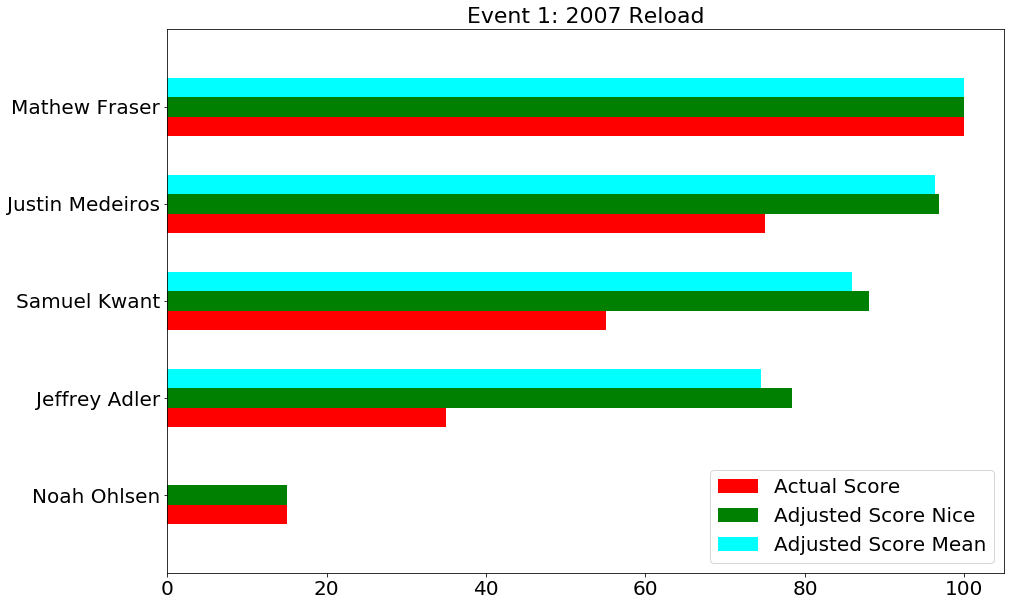

In [640]:
pretty_plot(event_1)

# Event 2

In [641]:
event_2 = stage_2[stage_2['ordinals']==10].sort_values('times')
event_2['score'] = [int(i[:-4]) for i in event_2['score']]
event_2 = event_2.sort_values('ranks', ascending = False)
event_2.name = 'Event 2: Corn Sack Sprint'

In [642]:
fastest_time_nice(event_2)
fastest_time_mean(event_2)
display(event_2)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
49,Justin Medeiros,10,3:21.09,5,15,201.09,15.00,0.00
89,Jeffrey Adler,10,3:20.87,4,35,200.87,15.63,0.74
69,Noah Ohlsen,10,3:18.24,3,55,198.24,23.20,9.64
29,Samuel Kwant,10,3:07.90,2,75,187.90,52.94,44.64
9,Mathew Fraser,10,2:51.54,1,100,171.54,100.00,100.00


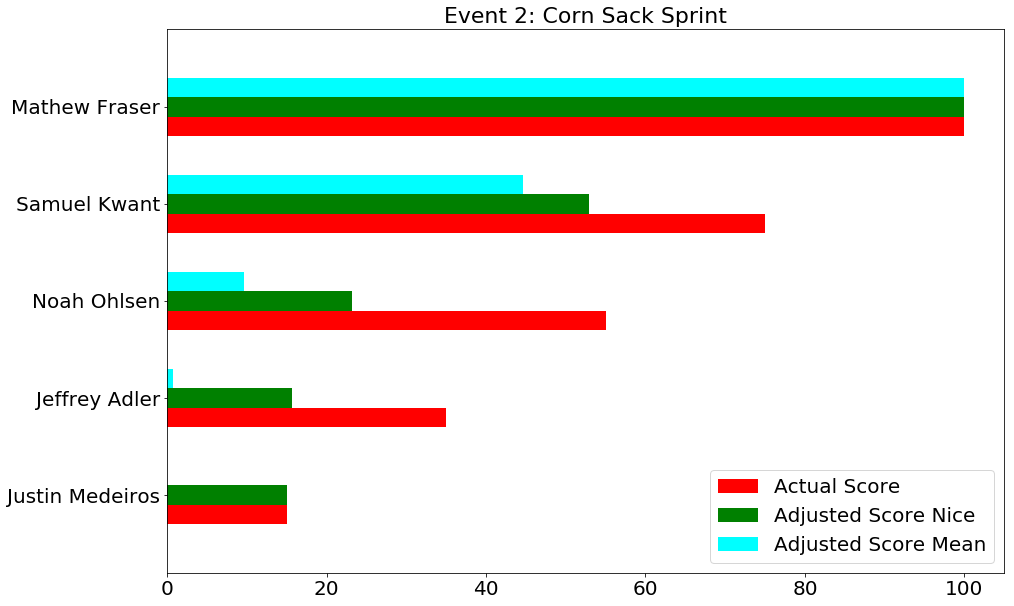

In [643]:
pretty_plot(event_2)

# Event 3

In [644]:
event_3 = stage_2[stage_2['ordinals']==11].sort_values('times')
event_3['score'] = [int(i[:-4]) for i in event_3['score']]
event_3 = event_3.sort_values('ranks', ascending = False)
event_3.name = 'Event 3: CrossFit Total'

In [645]:
most_weight_nice(event_3)
most_weight_mean(event_3)
display(event_3.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,adjusted_score_nice,adjusted_score_mean
90,Jeffrey Adler,11,1244,1,100,100.00,100.00
10,Mathew Fraser,11,1237,2,75,88.56,86.54
70,Noah Ohlsen,11,1200,3,55,28.08,15.38
30,Samuel Kwant,11,1196,4,35,21.54,7.69
50,Justin Medeiros,11,1192,5,15,15.00,0.00


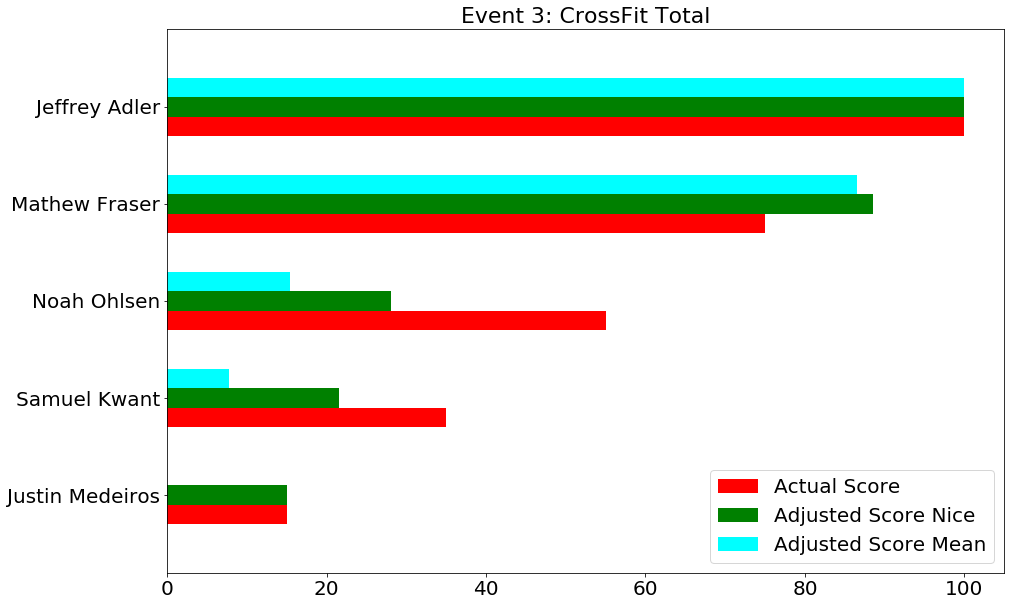

In [646]:
pretty_plot(event_3)

# Event 4

In [647]:
event_4 = stage_2[stage_2['ordinals']==12].sort_values('times')
event_4['score'] = [int(i[:-4]) for i in event_4['score']]
event_4 = event_4.sort_values('ranks', ascending=False)
event_4.name = 'Event 4: Handstand Sprint'

In [648]:
fastest_time_nice(event_4)
fastest_time_mean(event_4)
display(event_4)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
91,Jeffrey Adler,12,1:54.39,5,15,114.39,15.00,0.00
31,Samuel Kwant,12,1:43.77,4,35,103.77,41.91,31.66
71,Noah Ohlsen,12,1:39.45,3,55,99.45,52.86,44.54
51,Justin Medeiros,12,1:26.19,2,75,86.19,86.47,84.08
11,Mathew Fraser,12,1:20.85,1,100,80.85,100.00,100.00


In [649]:
event_4.name

'Event 4: Handstand Sprint'

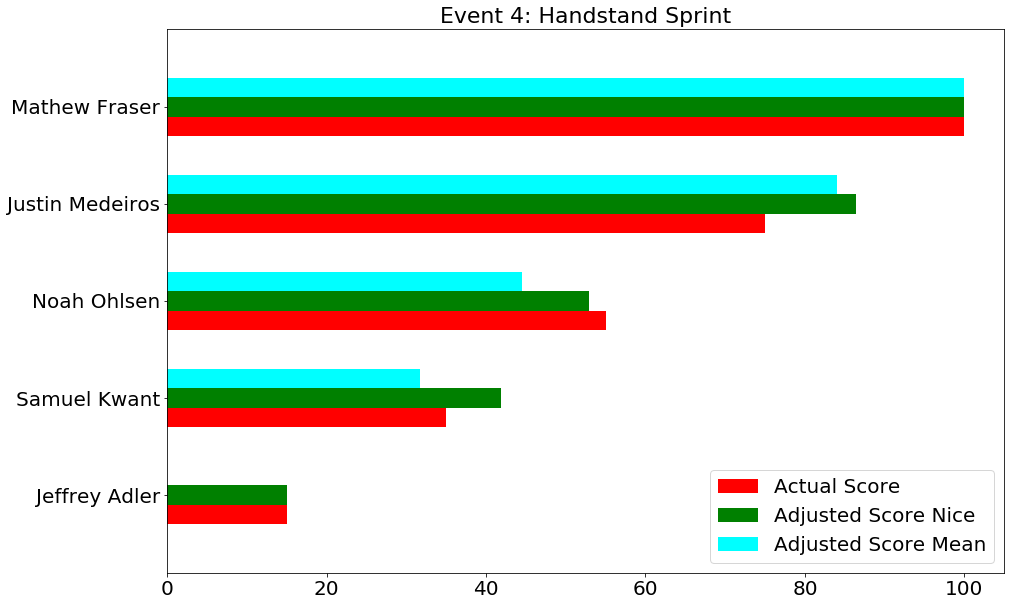

In [650]:
pretty_plot(event_4)

# Event 5

In [651]:
event_5 = stage_2[stage_2['ordinals']==13].sort_values('times')
event_5['score'] = [int(i[:-4]) for i in event_5['score']]
event_5 = event_5.sort_values('ranks', ascending=False)
event_5.name = 'Event 5: Ranch Loop'

In [652]:
fastest_time_nice(event_5)
fastest_time_mean(event_5)
display(event_5)

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
32,Samuel Kwant,13,1:10:11.27,5,15,"4,211.27",15.00,0.00
92,Jeffrey Adler,13,1:00:17.95,4,35,"3,617.95",82.80,79.77
72,Noah Ohlsen,13,59:11.00,3,55,"3,551.00",90.45,88.77
52,Justin Medeiros,13,58:17.48,2,75,"3,497.48",96.57,95.96
12,Mathew Fraser,13,57:47.45,1,100,"3,467.45",100.00,100.00


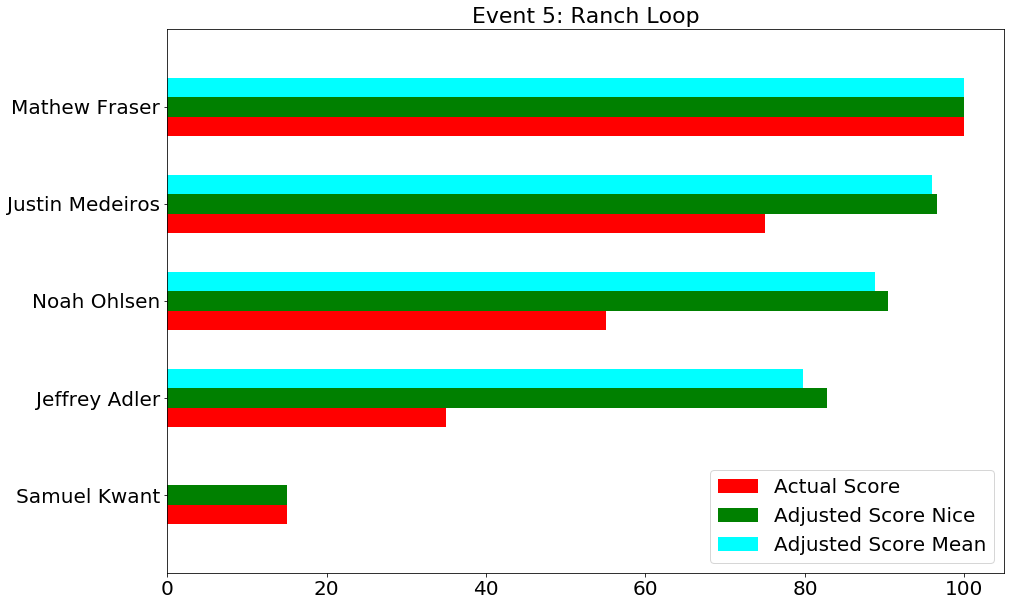

In [653]:
pretty_plot(event_5)

# Event 6

In [654]:
event_6 = stage_2[stage_2['ordinals']==14].sort_values('times')
event_6['score'] = [int(i[:-4]) for i in event_6['score']]
event_6 = event_6.sort_values('ranks', ascending = False)
event_6.name = 'Event 6: Toes-To-Bar/Lunge'

In [655]:
fastest_time_nice(event_6)
fastest_time_mean(event_6)
display(event_6.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
13,Mathew Fraser,14,3:04.77,1,100,184.77,100.00,100.00
73,Noah Ohlsen,14,3:11.49,2,75,191.49,90.20,88.47
53,Justin Medeiros,14,3:18.51,3,55,198.51,79.95,76.42
33,Samuel Kwant,14,3:39.23,4,35,219.23,49.72,40.85
93,Jeffrey Adler,14,4:03.03,5,15,243.03,15.00,0.00


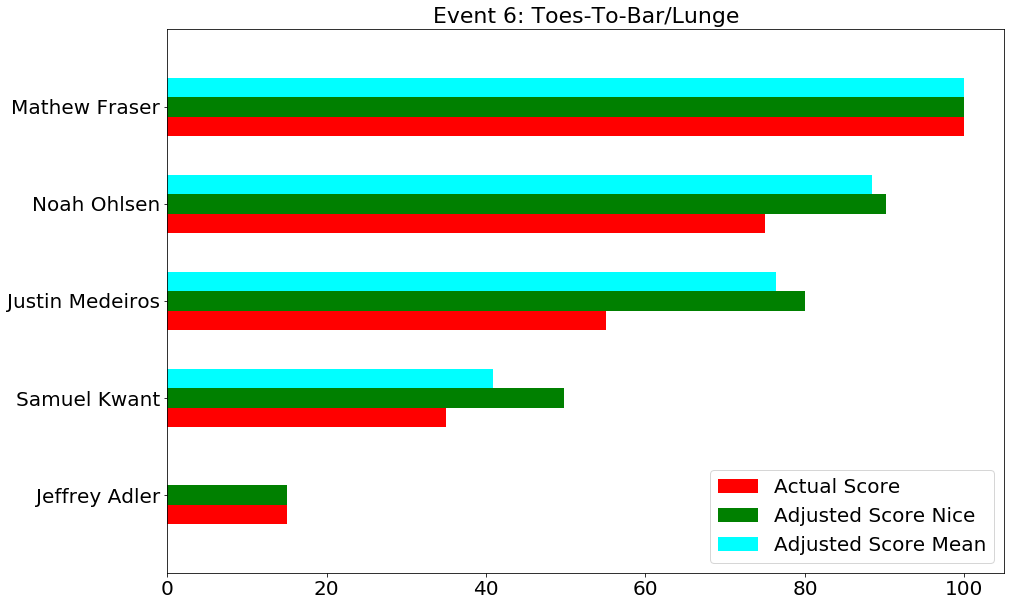

In [656]:
pretty_plot(event_6)

# Event 7

In [657]:
event_7_1_data = {'competitors': ['Mathew Fraser', 'Jeffrey Adler', 'Samuel Kwant', 'Noah Ohlsen', 'Justin Medeiros'],
                  'ordinals': [15.1, 15.1, 15.1, 15.1, 15.1],
                  'times': ['0:21.04', '0:21.17', '0:23.56', '0:27.41', '0:28.62']}
event_7_1 = pd.DataFrame.from_dict(event_7_1_data)
event_7_1

,competitors,ordinals,times
0,Mathew Fraser,15.10,0:21.04
1,Jeffrey Adler,15.10,0:21.17
2,Samuel Kwant,15.10,0:23.56
3,Noah Ohlsen,15.10,0:27.41
4,Justin Medeiros,15.10,0:28.62


In [658]:
event_7_2_data = {'competitors': ['Mathew Fraser', 'Samuel Kwant', 'Jeffrey Adler', 'Noah Ohlsen'],
                  'ordinals': [15.2, 15.2, 15.2, 15.2],
                  'times': ['0:25.47', '0:52.64', '0:55.52', '1:01.08']}
event_7_2 = pd.DataFrame.from_dict(event_7_2_data)
event_7_2

,competitors,ordinals,times
0,Mathew Fraser,15.20,0:25.47
1,Samuel Kwant,15.20,0:52.64
2,Jeffrey Adler,15.20,0:55.52
3,Noah Ohlsen,15.20,1:01.08


In [659]:
event_7_3_data = {'competitors': ['Mathew Fraser', 'Jeffrey Adler', 'Samuel Kwant'],
                  'ordinals': [15.3, 15.3, 15.3],
                  'times': ['0:44.05', '2:22.32', '2:55.89']}
event_7_3 = pd.DataFrame.from_dict(event_7_3_data)
event_7_3

,competitors,ordinals,times
0,Mathew Fraser,15.30,0:44.05
1,Jeffrey Adler,15.30,2:22.32
2,Samuel Kwant,15.30,2:55.89


In [660]:
fastest_time_nice(event_7_1)
fastest_time_mean(event_7_1)
display(event_7_1.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Mathew Fraser,15.10,0:21.04,21.04,100.00,100.00
1,Jeffrey Adler,15.10,0:21.17,21.17,98.54,98.28
2,Samuel Kwant,15.10,0:23.56,23.56,71.74,66.75
3,Noah Ohlsen,15.10,0:27.41,27.41,28.57,15.96
4,Justin Medeiros,15.10,0:28.62,28.62,15.00,0.00


In [661]:
fastest_time_nice(event_7_2)
fastest_time_mean(event_7_2)
display(event_7_2.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Mathew Fraser,15.20,0:25.47,25.47,100.00,100.00
1,Samuel Kwant,15.20,0:52.64,52.64,35.15,23.70
2,Jeffrey Adler,15.20,0:55.52,55.52,28.27,15.61
3,Noah Ohlsen,15.20,1:01.08,61.08,15.00,0.00


In [662]:
fastest_time_nice(event_7_3)
fastest_time_mean(event_7_3)
display(event_7_3.sort_values('times'))

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Mathew Fraser,15.30,0:44.05,44.05,100.00,100.00
1,Jeffrey Adler,15.30,2:22.32,142.32,36.64,25.46
2,Samuel Kwant,15.30,2:55.89,175.89,15.00,0.00


In [663]:
lst = [event_7_1, event_7_2, event_7_3]
pd.concat(lst)

,competitors,ordinals,times,total_seconds,adjusted_score_nice,adjusted_score_mean
0,Mathew Fraser,15.10,0:21.04,21.04,100.00,100.00
1,Jeffrey Adler,15.10,0:21.17,21.17,98.54,98.28
2,Samuel Kwant,15.10,0:23.56,23.56,71.74,66.75
3,Noah Ohlsen,15.10,0:27.41,27.41,28.57,15.96
4,Justin Medeiros,15.10,0:28.62,28.62,15.00,0.00
0,Mathew Fraser,15.20,0:25.47,25.47,100.00,100.00
1,Samuel Kwant,15.20,0:52.64,52.64,35.15,23.70
2,Jeffrey Adler,15.20,0:55.52,55.52,28.27,15.61
3,Noah Ohlsen,15.20,1:01.08,61.08,15.00,0.00
0,Mathew Fraser,15.30,0:44.05,44.05,100.00,100.00


In [664]:
import numpy as np

noah_nice = np.mean([28.57, 15.00])
sam_nice = np.mean([71.74, 35.15, 15.00])
jeff_nice = np.mean([98.54, 28.27, 36.64])

noah_mean = np.mean([15.96, 0.00])
sam_mean = np.mean([66.75, 23.70, 0.00])
jeff_mean = np.mean([98.28, 15.61, 25.46])

event_7_adjusted = {'competitors': ['Mathew Fraser', 'Jeffrey Adler', 'Samuel Kwant', 'Noah Ohlsen', 'Justin Medeiros'],
                  'adjusted_score_nice': [100.00, jeff_nice, sam_nice, noah_nice, 15.00],
                  'adjusted_score_mean': [100.00, jeff_mean, sam_mean, noah_mean, 0.00]}

event_7_adjusted = pd.DataFrame.from_dict(event_7_adjusted)


event_7_adjusted

,competitors,adjusted_score_nice,adjusted_score_mean
0,Mathew Fraser,100.00,100.00
1,Jeffrey Adler,54.48,46.45
2,Samuel Kwant,40.63,30.15
3,Noah Ohlsen,21.79,7.98
4,Justin Medeiros,15.00,0.00


In [665]:
event_7 = stage_2[stage_2['ordinals']==15].sort_values('ranks')

event_7['total_seconds'] = event_7['times']
event_7 = event_7.merge(event_7_adjusted, on='competitors')
event_7['score'] = [int(i[:-4]) for i in event_7['score']]
event_7 = event_7.sort_values('ranks', ascending = False)
event_7.name = 'Event 7: Snatch Speed Ladder'
event_7

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
4,Justin Medeiros,15,15,5,15,15,15.00,0.00
3,Noah Ohlsen,15,35,4,35,35,21.79,7.98
2,Samuel Kwant,15,55,3,55,55,40.63,30.15
1,Jeffrey Adler,15,75,2,75,75,54.48,46.45
0,Mathew Fraser,15,100,1,100,100,100.00,100.00


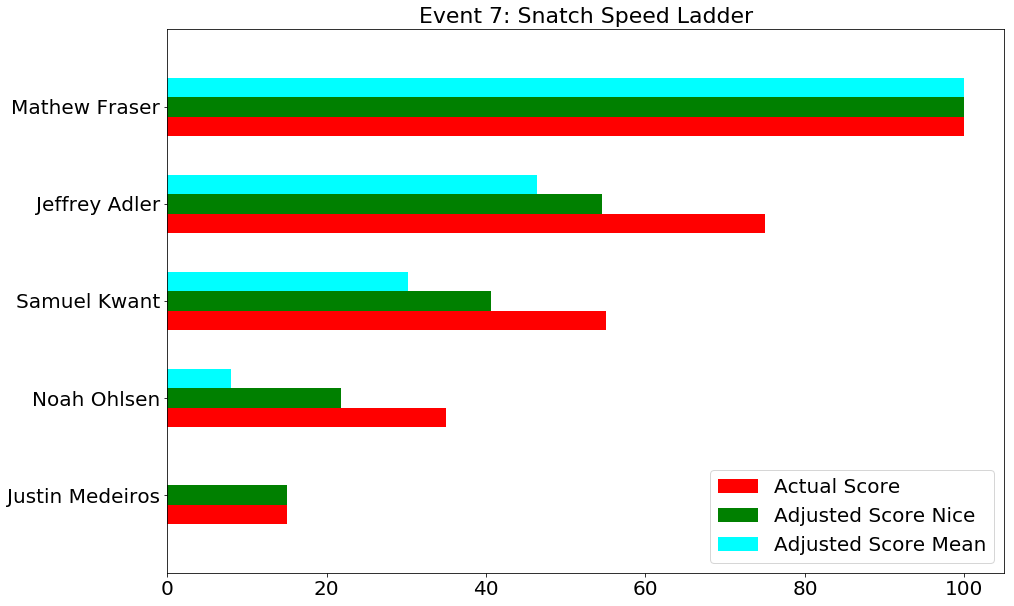

In [666]:
pretty_plot(event_7)

# Event 8

In [667]:
event_8 = stage_2[stage_2['ordinals']==16].sort_values('times')
event_8['score'] = [int(i[:-4]) for i in event_8['score']]
event_8 = event_8.sort_values('ranks', ascending = False)
event_8.name = 'Event 8: Bike Repeater'

In [668]:
fastest_time_nice(event_8)
fastest_time_mean(event_8)
display(event_8.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
15,Mathew Fraser,16,12:54.76,1,100,774.76,100.00,100.00
95,Jeffrey Adler,16,12:56.35,2,75,776.35,98.43,98.15
55,Justin Medeiros,16,13:20.52,3,55,800.52,74.56,70.07
35,Samuel Kwant,16,13:39.95,4,35,819.95,55.37,47.49
75,Noah Ohlsen,16,14:20.82,5,15,860.82,15.00,0.00


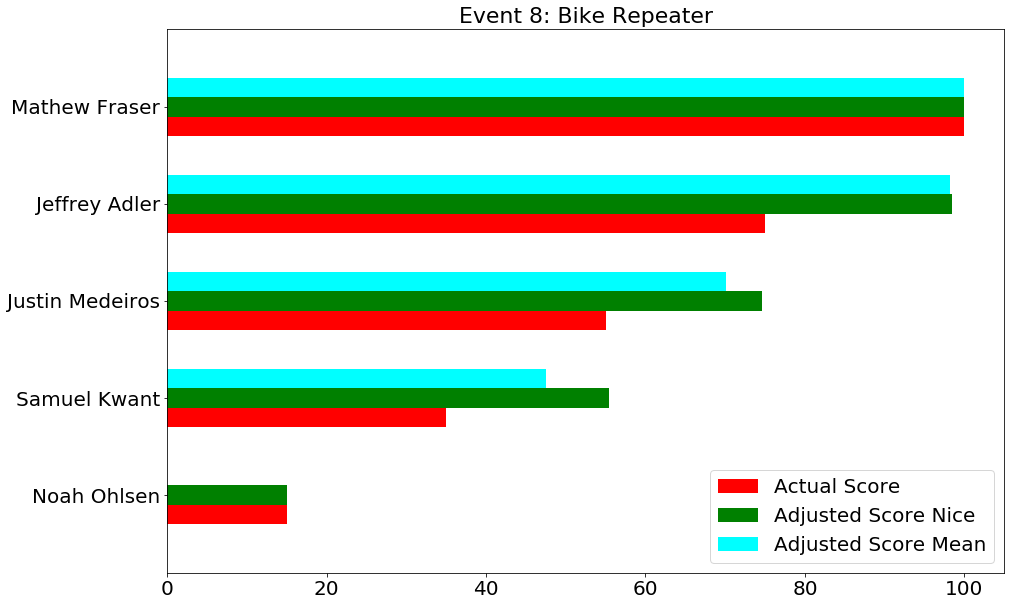

In [669]:
pretty_plot(event_8)

# Event 9

In [670]:
event_9 = stage_2[stage_2['ordinals']==17].sort_values('times')
event_9['score'] = [int(i[:-4]) for i in event_9['score']]
event_9 = event_9.sort_values('ranks', ascending = False)
event_9.name = 'Event 9: Happy Star'

In [671]:
fastest_time_nice(event_9)
fastest_time_mean(event_9)
display(event_9.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
16,Mathew Fraser,17,8:18.21,1,100,498.21,100.00,100.00
36,Samuel Kwant,17,8:33.91,2,75,513.91,67.55,61.82
96,Jeffrey Adler,17,8:40.17,3,55,520.17,54.61,46.60
76,Noah Ohlsen,17,8:54.53,4,35,534.53,24.92,11.67
56,Justin Medeiros,17,8:59.33,5,15,539.33,15.00,0.00


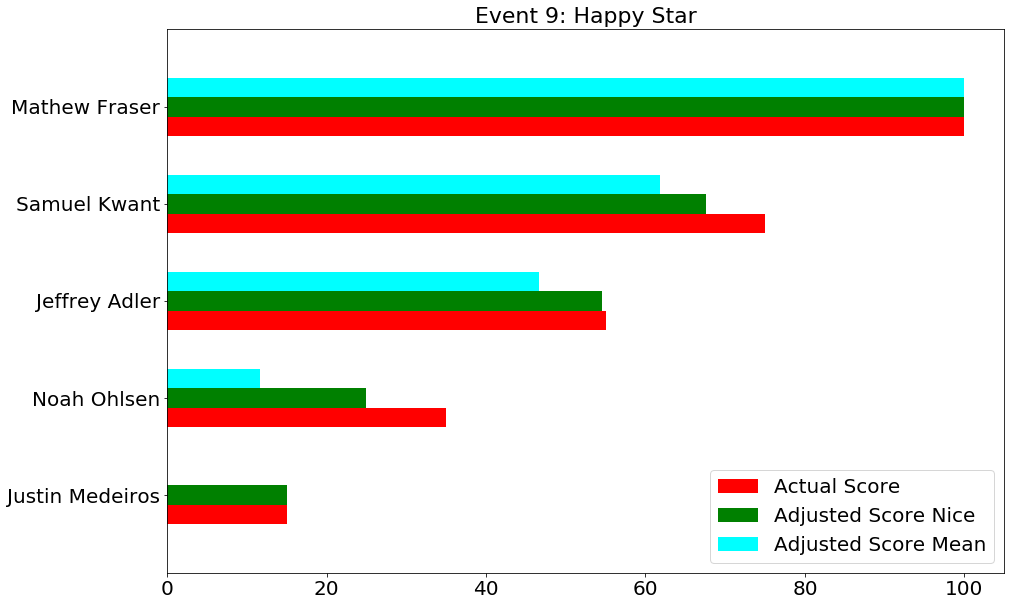

In [672]:
pretty_plot(event_9)

# Event 10

In [673]:
event_10 = stage_2[stage_2['ordinals']==18].sort_values('times')
event_10['score'] = [int(i[:-4]) for i in event_10['score']]
event_10 = event_10.sort_values('ranks', ascending = False)
event_10.name = "Event 10: Swim 'N' Stuff"

In [674]:
fastest_time_nice(event_10)
fastest_time_mean(event_10)
display(event_10.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
37,Samuel Kwant,18,8:29.66,1,100,509.66,100.00,100.00
17,Mathew Fraser,18,8:38.14,2,75,518.14,90.21,88.48
57,Justin Medeiros,18,8:52.93,3,55,532.93,73.14,68.40
77,Noah Ohlsen,18,9:14.34,4,35,554.34,48.43,39.33
97,Jeffrey Adler,18,9:43.30,5,15,583.30,15.00,0.00


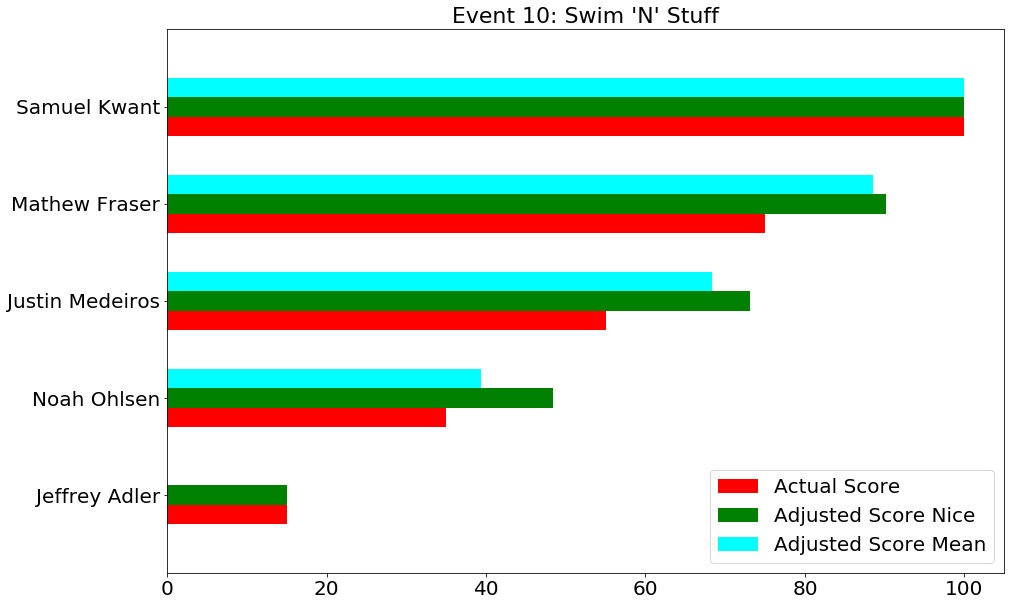

In [675]:
pretty_plot(event_10)

# Event 11

In [676]:
event_11 = stage_2[stage_2['ordinals']==19].sort_values('times')
event_11['score'] = [int(i[:-4]) for i in event_11['score']]
event_11 = event_11.sort_values('ranks', ascending = False)
event_11.name = 'Event 11: Sprint Sled Sprint'

In [677]:
fastest_time_nice(event_11)
fastest_time_mean(event_11)
display(event_11.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
18,Mathew Fraser,19,:56.08,1,100,56.08,100.00,100.00
38,Samuel Kwant,19,:56.45,2,75,56.45,96.71,96.13
58,Justin Medeiros,19,1:01.97,3,55,61.97,47.63,38.39
78,Noah Ohlsen,19,1:03.89,4,35,63.89,30.56,18.31
98,Jeffrey Adler,19,1:05.64,5,15,65.64,15.00,0.00


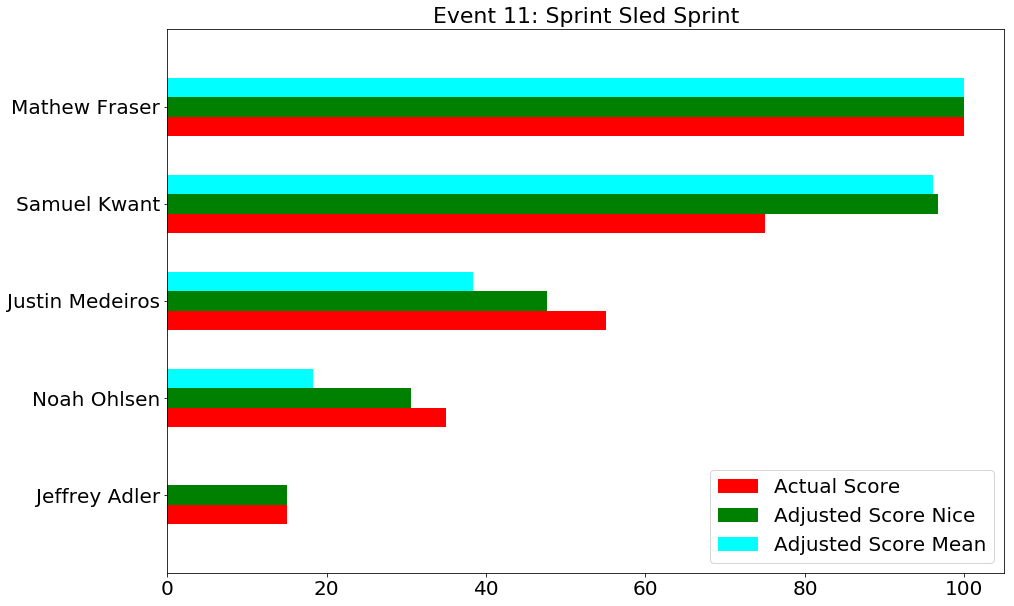

In [678]:
pretty_plot(event_11)

# Event 12

In [679]:
event_12 = stage_2[stage_2['ordinals']==20].sort_values('times')
event_12['score'] = [int(i[:-4]) for i in event_12['score']]
event_12 = event_12.sort_values('ranks', ascending = False)
event_12.name = 'Event 12: Atlanta'

In [680]:
fastest_time_nice(event_12)
fastest_time_mean(event_12)
display(event_12.sort_values('ranks'))

,competitors,ordinals,times,ranks,score,total_seconds,adjusted_score_nice,adjusted_score_mean
19,Mathew Fraser,20,51:46.66,1,100,"3,106.66",100.00,100.00
79,Noah Ohlsen,20,52:24.75,2,75,"3,144.75",96.11,95.43
59,Justin Medeiros,20,53:18.87,3,55,"3,198.87",90.59,88.93
99,Jeffrey Adler,20,57:28.45,4,35,"3,448.45",65.13,58.98
39,Samuel Kwant,20,1:05:39.80,5,15,"3,939.80",15.00,0.00


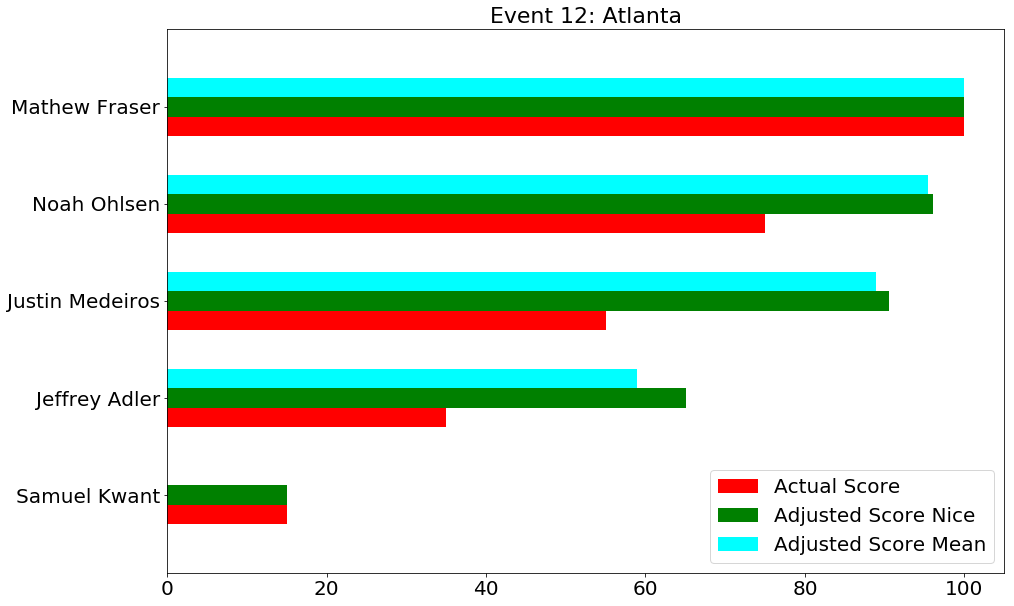

In [681]:
pretty_plot(event_12)

# Final Analysis

In [682]:
frames = [event_1, event_2, event_3, event_4, event_5, event_6, event_7, event_8, event_9, event_10, event_11, event_12]
final_df = pd.concat(frames)[['competitors', 'ordinals', 'times', 'ranks', 'score', 'total_seconds', 'adjusted_score_nice', 'adjusted_score_mean']]
final_df['event #'] = final_df['ordinals']-8
final_df = final_df.drop(columns=['ordinals','total_seconds'])


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [683]:
final_df.sort_values(['event #','ranks']).to_clipboard(sep=',', index=False) 

In [684]:
final_df[final_df['competitors']=='Jeffrey Adler']

,competitors,times,ranks,score,adjusted_score_nice,adjusted_score_mean,event #
88,Jeffrey Adler,14:03.42,4,35,78.34,74.52,1
89,Jeffrey Adler,3:20.87,4,35,15.63,0.74,2
90,Jeffrey Adler,1244,1,100,100.00,100.00,3
91,Jeffrey Adler,1:54.39,5,15,15.00,0.00,4
92,Jeffrey Adler,1:00:17.95,4,35,82.80,79.77,5
93,Jeffrey Adler,4:03.03,5,15,15.00,0.00,6
1,Jeffrey Adler,75,2,75,54.48,46.45,7
95,Jeffrey Adler,12:56.35,2,75,98.43,98.15,8
96,Jeffrey Adler,8:40.17,3,55,54.61,46.60,9
97,Jeffrey Adler,9:43.30,5,15,15.00,0.00,10


In [685]:
adjusted_placements = final_df.groupby('competitors').agg({'adjusted_score_nice':'sum', 'adjusted_score_mean':'sum', 'score':'sum'}).sort_values('adjusted_score_nice', ascending=False)


In [686]:
adjusted_placements['adjusted_placement'] = [i+1 for i in range(len(adjusted_placements))]

In [687]:
adjusted_placements

,adjusted_score_nice,adjusted_score_mean,score,adjusted_placement
competitors,,,,
Mathew Fraser,"1,178.77","1,175.02",1150,1
Justin Medeiros,705.78,618.57,560,2
Samuel Kwant,644.36,546.30,605,3
Jeffrey Adler,609.42,505.20,505,4
Noah Ohlsen,536.59,419.52,540,5


In [688]:
actual_placement = []

for i in range(len(leaderboard)):
    competitors = leaderboard[i]['entrant']['competitorName']
    placement = leaderboard[i]['overallRank']
    actual_placement.append((competitors, placement))

In [689]:
final_placements = pd.DataFrame(actual_placement, columns=['competitors','actual_placement']).iloc[0:5]

In [690]:
final_placements

,competitors,actual_placement
0,Mathew Fraser,1
1,Samuel Kwant,2
2,Justin Medeiros,3
3,Noah Ohlsen,4
4,Jeffrey Adler,5


In [691]:
df = final_placements.join(adjusted_placements, how='inner', on='competitors')
df = df[['competitors','score','actual_placement','adjusted_score_nice','adjusted_score_mean','adjusted_placement']]
df = df.sort_values('actual_placement', ascending=False)
df.name = 'Final Results'

In [694]:
df.sort_values('actual_placement', ascending=True).to_clipboard(sep=',', index=False)


In [ ]:

pretty_plot(df)